In [3]:
library(Seurat)
library(org.Hs.eg.db)
library(clusterProfiler)
library(patchwork)
library(dplyr)
library(RColorBrewer)
library(ggplot2)
library(cowplot)
library(ggpubr)
library(readr)
library(tidyr)
library(ggforce)
library(pals)
library(pheatmap)
library(scales)
library(ggthemes)
library(clustree)

In [4]:
setwd("/mnt/public3/chaohy/pancancer/plot1cell")
rds <- readRDS("20240103_Integ.final_UMAP_Clean.rds")
metadata <- readRDS("20240107_Integ.final.metadata.rds")
rds@meta.data<-metadata

In [26]:
metadata <- readRDS("20240107_Integ.final.metadata.rds")
rds@meta.data<-metadata

In [27]:
# keytypes(org.Hs.eg.db)
# bitr("CD3D", fromType="SYMBOL", toType=c("ENTREZID","PFAM","UNIPROT","ENSEMBL"), OrgDb="org.Hs.eg.db")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

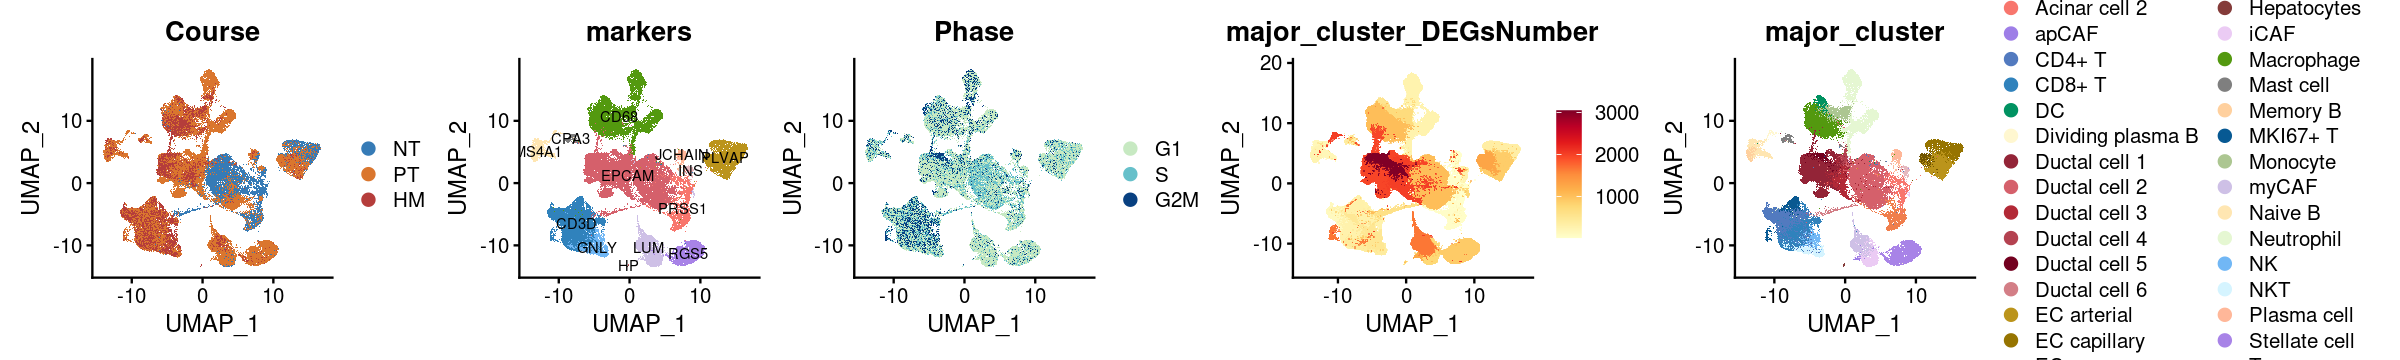

In [7]:
colors_jo <- read.table("/mnt/public3/chaohy/pancancer/plot1cell/colors_jo.txt", sep="\t", header=T,comment.char = "")

colors_jo$major_cluster <- factor(colors_jo$major_cluster,levels = colors_jo$major_cluster)
major_cluster_color = setNames(colors_jo$major_color, names(table(colors_jo$major_cluster)))
DimPlot(rds, label=F, label.box=F,group.by ="major_cluster",cols = major_cluster_color) -> p1

rds@meta.data$Course <- factor(rds@meta.data$Course,levels = c("NT","PT","HM"))
DimPlot(rds, label=F, label.box=F,group.by ="Course",cols = c("#367BB6","#DA762E","#B53D3B")) -> p2

colors_jo$markers <- factor(colors_jo$markers,levels = unique(colors_jo$markers))
markers_color = setNames(unique(colors_jo$primary_color), names(table(colors_jo$markers)))
DimPlot(rds, label=T, label.box=F,label.size = 3, group.by ="markers",cols = markers_color) + NoLegend() -> p3

rds@meta.data$Phase <- factor(rds@meta.data$Phase,levels = c("G1","S","G2M"))
DimPlot(rds, label=F, label.box=F,group.by ="Phase",pt.size = 0.4,cols = c("#C7E9C2","#66C0CA","#084081")) -> p4

FeaturePlot(rds, features='major_cluster_DEGsNumber', reduction='umap', order=TRUE, 
                    cols=brewer.ylorrd(max(rds$major_cluster_DEGsNumber)),min.cutoff='q1', combine=T, raster = T)  -> p5
options(repr.plot.width=20, repr.plot.height=3)
(p2 + p3 + p4 + p5 + p1) + plot_layout(nrow = 1)

pdf("/mnt/public3/chaohy/pancancer/plot1cell/five_UMAP.pdf", width=20, height=3)
(p2 + p3 + p4 + p5 + p1) + plot_layout(nrow = 1)
dev.off()

In [11]:
colors_jo

primary_cluster,major_cluster,primary_color,major_color,markers
<chr>,<fct>,<chr>,<chr>,<chr>
Ductal cell,Ductal cell 1,#D5606B,#932437,EPCAM
Ductal cell,Ductal cell 2,#D5606B,#D5606B,EPCAM
Ductal cell,Ductal cell 3,#D5606B,#B22936,EPCAM
Ductal cell,Ductal cell 4,#D5606B,#B44250,EPCAM
Ductal cell,Ductal cell 5,#D5606B,#73001F,EPCAM
Ductal cell,Ductal cell 6,#D5606B,#D37E86,EPCAM
Acinar cell,Acinar cell 1,#F8766D,#F07E4C,PRSS1
Acinar cell,Acinar cell 2,#F8766D,#F8766D,PRSS1
Endocrine cell,Endocrine cell,#E6B8BF,#E6B8BF,INS


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



png 
  2

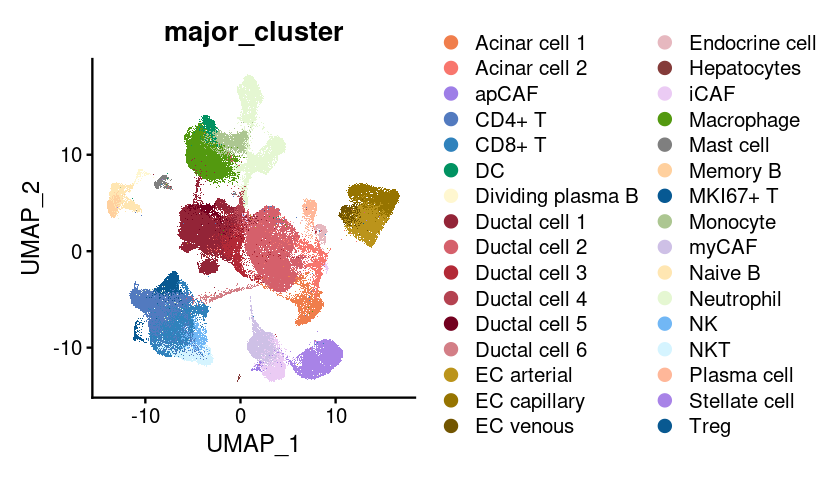

In [10]:
colors_jo <- read.table("/mnt/public3/chaohy/pancancer/plot1cell/colors_jo.txt", sep="\t", header=T,comment.char = "")
colors_jo$major_cluster <- factor(colors_jo$major_cluster,levels = colors_jo$major_cluster)
major_cluster_color = setNames(colors_jo$major_color, names(table(colors_jo$major_cluster)))
DimPlot(rds, label=F, label.box=F,group.by ="major_cluster",cols = major_cluster_color) -> p1
options(repr.plot.width=7, repr.plot.height=4)
p1
pdf("/mnt/public3/chaohy/pancancer/plot1cell/major_cluster_labels.pdf", width=8, height=8)
p1
dev.off()

In [129]:
gene_bed %>% head()
major_cluster_DEGs %>% head()

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<chr>
1,chr1,29369,34369,HSALNG0000002,lncRNA
2,chr1,17750,22750,HSALNG0000003,lncRNA
3,chr1,17435,22435,MIR6859-1,miRNA
4,chr1,25939,30939,HSALNG0000004,lncRNA
5,chr1,24553,29553,HSALNG0000005,lncRNA
6,chr1,25365,30365,MIR1302-2,miRNA


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,pct.diff,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,0,2.701194,0.667,0.104,0,CD4+ T,IL7R,0.563,NA
2,0,2.319037,0.725,0.625,0,CD4+ T,EEF1A1,0.100,NA
3,0,2.055434,0.546,0.146,0,CD4+ T,LTB,0.400,NA
4,0,1.914767,0.363,0.184,0,CD4+ T,HLA-B,0.179,NA
5,0,1.848418,0.528,0.142,0,CD4+ T,CD69,0.386,NA
6,0,1.702950,0.598,0.124,0,CD4+ T,CD2,0.474,NA


In [144]:
gene_bed[gene_bed$V5=="lncRNA",] -> gene_bed_lncRNA
gene_bed[gene_bed$V5=="protein_coding",] -> gene_bed_PC

major_cluster_DEGs[major_cluster_DEGs$gene %in% gene_bed_PC$V4,] %>% dim()
dim(major_cluster_PCs)

[1] 27451     9

[1] 32  2

png 
  2

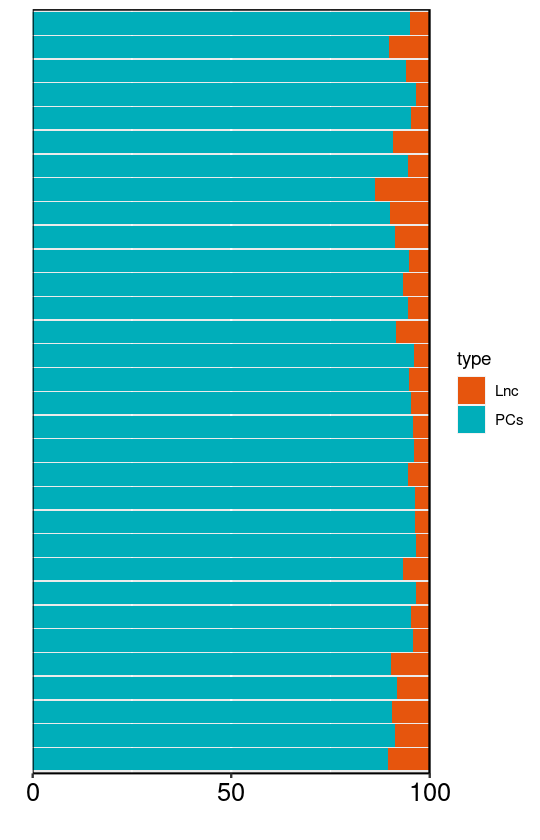

In [145]:
read.csv("/mnt/public3/chaohy/pancancer/fig1c/Major_markerGenes.csv", header=T) -> major_cluster_DEGs
read.table("/mnt/public3/chaohy/pancancer/fig1c/gene.bed", sep="\t", header=F) -> gene_bed
gene_bed[gene_bed$V5=="lncRNA",] -> gene_bed_lncRNA
gene_bed[gene_bed$V5=="protein_coding",] -> gene_bed_PC
# 过滤
major_cluster_DEGs[major_cluster_DEGs$p_val_adj < 0.05,] %>%  dplyr::filter(pct.1>0.2 & pct.2<pct.1) -> major_cluster_DEGs
# 提取major_cluster_DEGs的name列为"NA"的行
major_cluster_DEGs[major_cluster_DEGs$gene %in% gene_bed_PC$V4,]  -> major_cluster_PCs
# 提取major_cluster_DEGs的name列不为"NA"的行
major_cluster_DEGs[major_cluster_DEGs$gene %in% gene_bed_lncRNA$V4,] -> major_cluster_Lnc
# 统计major_cluster_PCs中根据cluster分类的基因数目
major_cluster_PCs %>% group_by(cluster) %>% summarise(PCs=n()) -> major_cluster_PCs
major_cluster_Lnc %>% group_by(cluster) %>% summarise(Lnc=n()) -> major_cluster_Lnc
# 合并major_cluster_PCs和major_cluster_Lnc
merge(major_cluster_PCs, major_cluster_Lnc, by="cluster") -> PCs_Lnc_numStat
# 将数量转换为百分比
PCs_Lnc_numStat[,2:3] <- PCs_Lnc_numStat[,2:3] * 100 / rowSums(PCs_Lnc_numStat[,2:3])

cell_list <- c('Endocrine cell','Acinar cell 1','Acinar cell 2',
 'Ductal cell 2','Ductal cell 6','Ductal cell 5','Ductal cell 1','Ductal cell 3','Ductal cell 4',
 'EC arterial','EC capillary','EC venous',
 'Hepatocytes','Stellate cell',
 'myCAF','iCAF','apCAF',
 'MKI67+ T','CD4+ T','Treg','CD8+ T',
 'NKT','NK',
 'Naive B','Memory B','Dividing plasma B',
 'Plasma cell','Monocyte','Macrophage',
 'DC','Neutrophil','Mast cell')
# 将PCs_Lnc_numStat数据转换为长格式
gathered_data <- gather(PCs_Lnc_numStat, key="type", value="num", -cluster)
# 将cluster列转换为因子
gathered_data$cluster <- factor(gathered_data$cluster, levels=cell_list)
# 百分比堆叠柱状图
options(repr.plot.width=4.5, repr.plot.height=7)
ggplot(gathered_data, aes(x = cluster, y = num, fill = type)) + 
  geom_bar(stat = "identity", position = "stack") + 
  scale_y_continuous(expand = c(0, 0), breaks = seq(0, 100, 50)) +
  scale_fill_manual(values = c("#e6550d", "#00aeba")) + 
  theme(legend.position = "right",
        axis.text.y = element_blank(),
        axis.text.x = element_text(size = 15, colour = "black"),
        axis.ticks.length.y = unit(0, "cm"),
        panel.border = element_rect(color = "black", fill = NA)) + 
  labs(x = "", y = "") + 
  coord_flip() -> p1
p1

In [120]:
cell_list <- c('Endocrine cell','Acinar cell 1','Acinar cell 2',
 'Ductal cell 2','Ductal cell 6','Ductal cell 5','Ductal cell 1','Ductal cell 3','Ductal cell 4',
 'EC arterial','EC capillary','EC venous',
 'Hepatocytes','Stellate cell',
 'myCAF','iCAF','apCAF',
 'MKI67+ T','CD4+ T','Treg','CD8+ T',
 'NKT','NK',
 'Naive B','Memory B','Dividing plasma B',
 'Plasma cell','Monocyte','Macrophage',
 'DC','Neutrophil','Mast cell')

rds$major_cluster <- factor(rds$major_cluster,levels = cell_list)

genes_less <- c('INS', 'SST',
           'PRSS1', 'CPA1',
           'CTRC', 'CTRB1',
           'FXYD2',
           'HSPA1B',
           'AGR2',
           'MUC1','FXYD3', 
           'MMP7', 'KRT17', 'EPCAM',
           'PLVAP', 'EFNB2',
           'CA4', 'RGCC', 
           'ACKR1', 'SELP',
           'HP', 'APOC3', 
           'RGS5',
           'LUM', 'DCN', 'MMP11',
           'CFD', 'DPT',
           'CXCL2','COL1A2',
           'CD3D', 'MKI67','CENPF',
           'CD4', 'IL7R',
           'FOXP3',
           'CD8A','GZMK',
           'GNLY',
           'CD79A', 'MS4A1',
           'CD27',
           'CD38',
           'MZB1', 'JCHAIN',
           'FCN1', 'CD14',
           'CD68', 'C1QB',
           'CD1C', 
           'CSF3R','S100A9',
           'CPA3', 'TPSB2')

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2

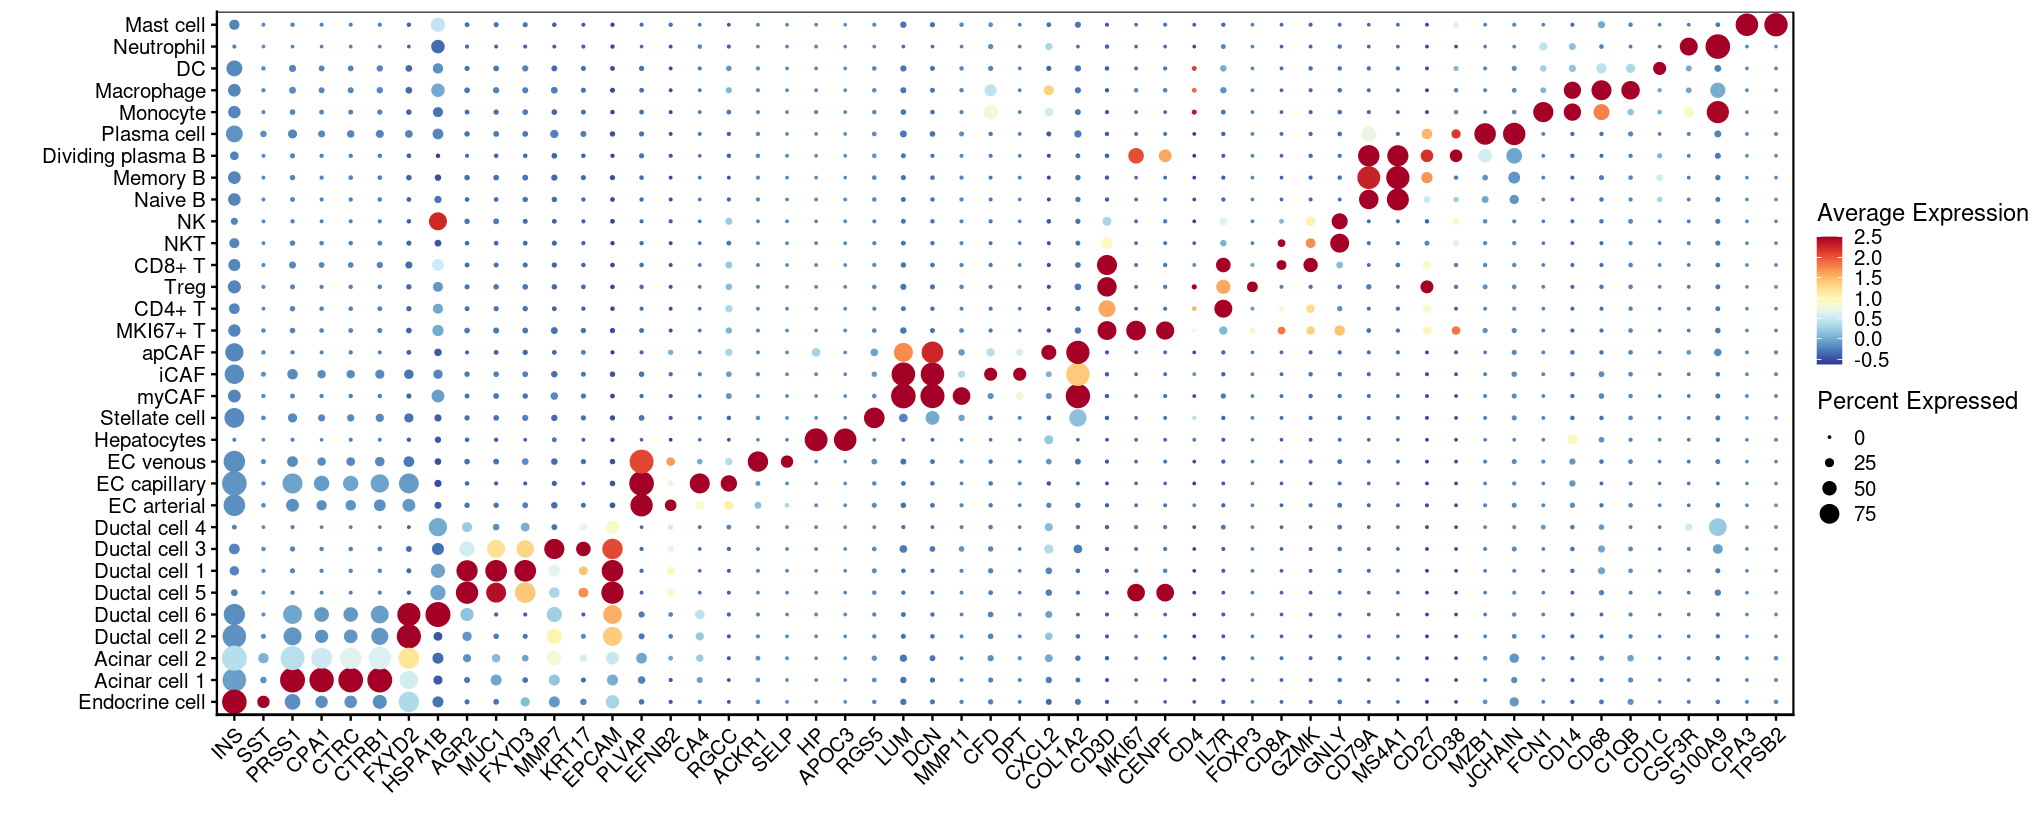

In [122]:
DotPlot(rds, group.by = 'major_cluster', features = unique(genes_less)) + RotatedAxis()+
  scale_color_gradientn(colours=rev(brewer.rdylbu(20)), guide = "colourbar") +
  theme(panel.border = element_rect(color = "black"),axis.text.x=element_text(angle=45, hjust=1)) + 
  labs(x="",y="") -> p6
options(repr.plot.width=17, repr.plot.height=7)
p6 

png 
  2

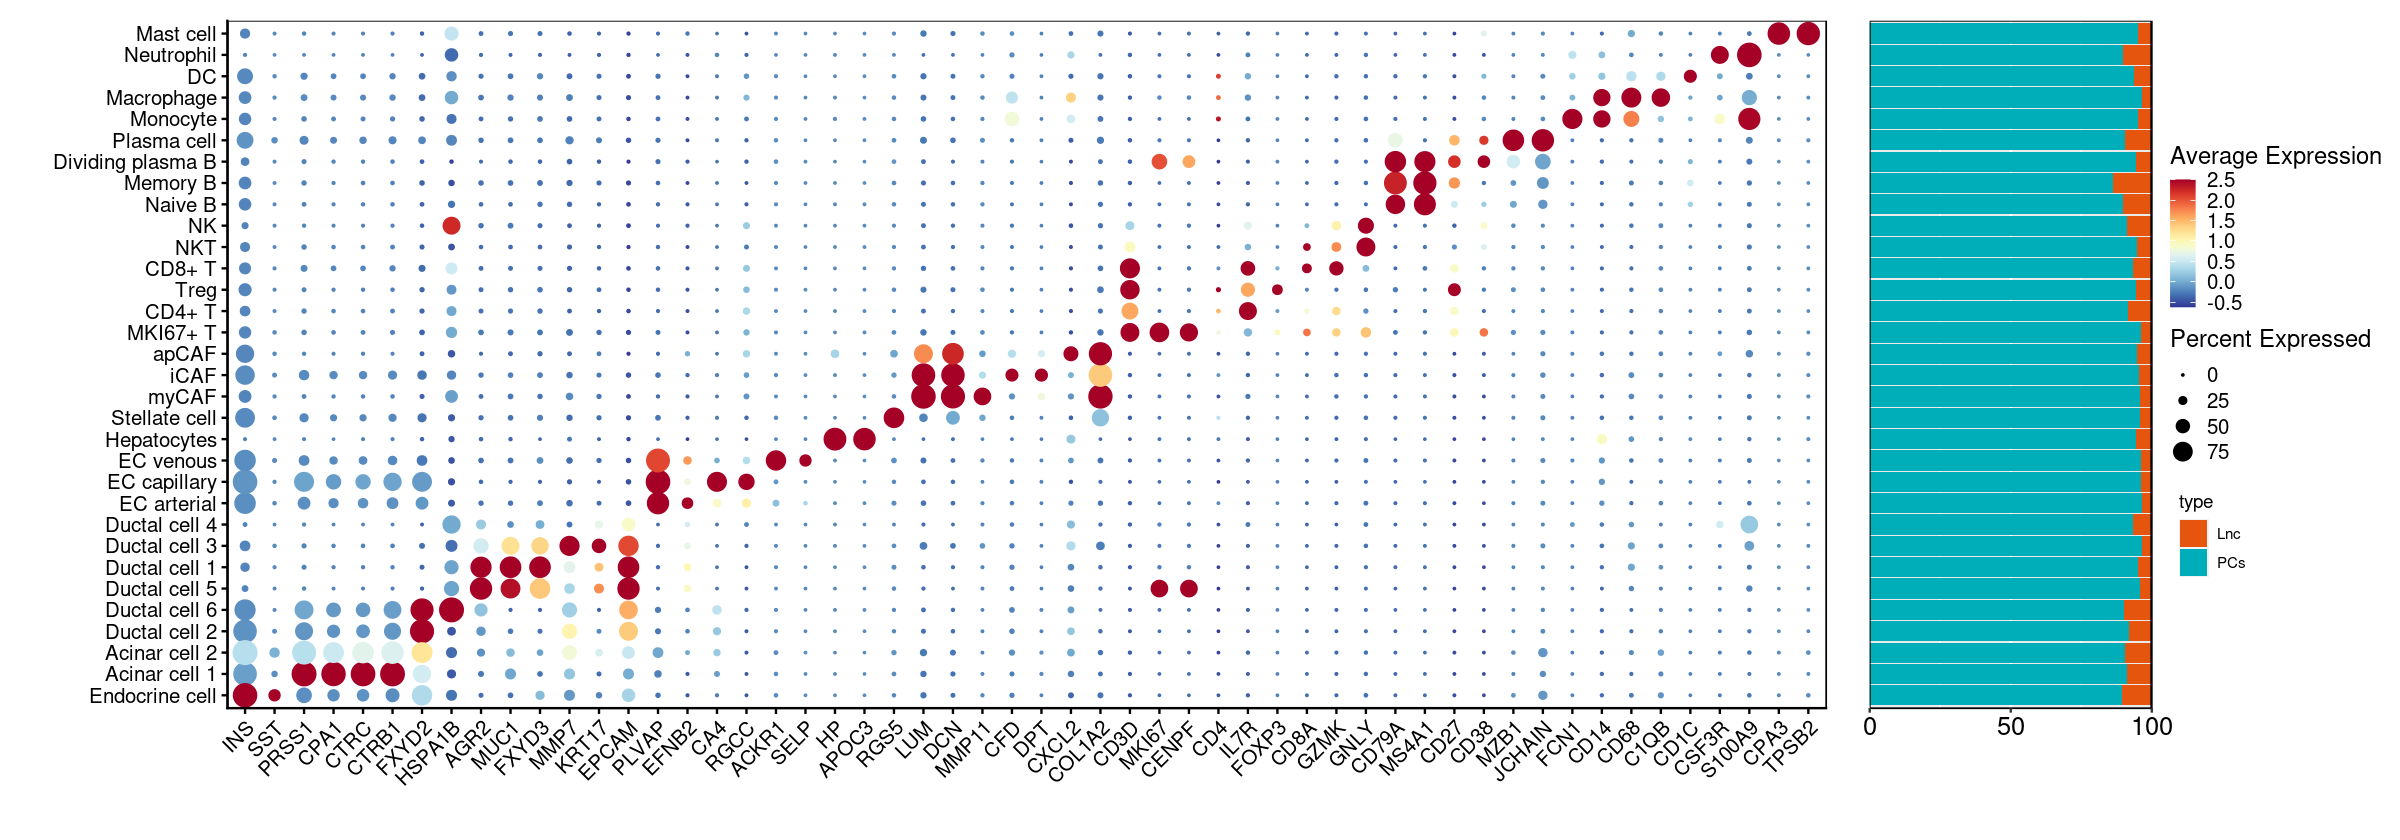

In [146]:
options(repr.plot.width=20, repr.plot.height=7)
p6 + p1 + plot_layout(nrow = 1, widths = c(0.85, 0.15),guide = 'collect')
pdf("/mnt/public3/chaohy/pancancer/fig1c/markersDotplot_and_NumStat.pdf", width=20, height=7)
p6 + p1 + plot_layout(nrow = 1, widths = c(0.85, 0.15),guide = 'collect')
dev.off()